# OPERA RTC-S1 Time-Series: Snow Example

## 1. Import needed Python package

In [1]:
from getpass import getpass
import opensarlab_lib as osl
from pathlib import Path
from pprint import pprint

from datetime import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from osgeo import gdal

import re

import asf_search as disco
from asf_search.download.file_download_type import FileDownloadType

In [13]:
#a func
def timediff(time1,time2,form='days'):
    '''time difference between time2 and time1 expressed as either days or seconds.
    inputs must be in numpy datetime format.'''
    diff = time2-time1
    if form=='seconds':
        diff = diff.seconds+diff.days*86400
    elif form=='days':
        diff = diff.seconds/86400+diff.days
    return diff

def dB(arr):
    '''convert power scale image to dB'''
    return 10*np.log10(arr)

## 2. Authenticate with asf_search and start a session

**Gather credentials for authentication with Earth Data Login**

In [3]:
username = input("Enter your EDL username")
password = getpass("Enter your EDL password")

Enter your EDL username acjohnson16
Enter your EDL password ········


**Start an asf_search session**

In [4]:
try:
    user_pass_session = disco.ASFSession().auth_with_creds(username, password)
except disco.ASFAuthenticationError as e:
    print(f'Auth failed: {e}')
else:
    print('Success!')

Success!


## 3. Create a directory in which to download the RTCs

**Create a data directory alongside the Jupyter Book containing this notebook** 

In [10]:
Path.cwd().parents[0]

PosixPath('/home/jovyan')

In [5]:
name = input("Enter the name of a directory to create, which will hold your downloaded RTCs")
# data_dir = Path.cwd().parents[0]/name
data_dir = Path.cwd()/name
data_dir.mkdir(exist_ok=True)
print(f"Data Directory: {data_dir}")

Enter the name of a directory to create, which will hold your downloaded RTCs hayes


Data Directory: /home/jovyan/OperaWorkshop/hayes


## 4. Search for OPERA RTC-S1 products

**Option 1: List Search**

- Search by OPERA product ID

- Identify OPERA IDs with an [OPERA-S1 Geographic Search on Vertex](https://search.asf.alaska.edu/#/?maxResults=250&dataset=OPERA-S1)


**Option 2: Geographic Search**
- Search by intersection with an area of interest
  - Define in WKT as a POINT or POLYGON
    - `'intersectsWith': 'POINT(-117.4231 35.7597)'`
    - `'intersectsWith': 'POLYGON((-114.9066 35.2997,-114.159 35.2997,-114.159 35.8598,-114.9066 35.8598,-114.9066 35.2997))'`

In [ ]:
options = {
    'intersectsWith': 'POINT(-114.4556 36.1562)',
    'dataset': 'OPERA-S1',
    'start': '2016-07-03T00:00:00Z',
    'end': '2023-12-19T00:00:00Z',
    # 'flightDirection': 'ASCENDING',
    'processingLevel': ['RTC'],
    'maxResults': '1000'
}

results = disco.search(**options)
burst_ids = list(set([r.properties['operaBurstID'] for r in results]))
print(f"Found {len(results)} RTCs with {len(burst_ids)} burst IDs")

**Option 3: The option I'm using here**
* Use a burst ID that I show people how to get

operaBurstID='T094_200134_IW2'

In [6]:
year = 2020
options = {
    'dataset': 'OPERA-S1',
    'start': f'{year}-01-01T00:00:00Z',
    'end': f'{year+1}-01-01T00:00:00Z',
    'operaBurstID': 'T094_200134_IW2',
    'processingLevel': ['RTC'],
    'maxResults': '1000'
}
results = disco.search(**options)

In [154]:
# results[5].properties

## 5. Filter the Results

**Select the burst IDs to download**

In [ ]:
##nop
# print("\nSelect the RTC burst IDs you wish to download")
# burst_select = osl.select_mult_parameters(burst_ids)
# display(burst_select)

In [ ]:
# #nop
# bursts = burst_select.value
# selected_results = [r for r in results if r.properties['operaBurstID'] in bursts]
# selected_results

**Create directories for each burst**

In [ ]:
# #again. lets not
# for b in bursts:
#     (data_dir/b).mkdir(exist_ok=True)

**When >1 RTC are found for a burst/acquisition date, select the most recently processed bursts**

The geographic search may return current and superceded data


In [ ]:
# #It didn't happen. We made it up.
# filtered_bursts = dict()
# acquisition_date_regex = r"(?<=OPERA_L2_RTC-S1_)T\d{3}-\d{6}-IW\d_\d{8}T\d{6}Z(?=_\d{8}T\d{6}Z)"
# process_date_regex = r"(?<=OPERA_L2_RTC-S1_T\d{3}-\d{6}-IW\d_\d{8}T\d{6}Z_)\d{8}T\d{6}Z"

# for b in selected_results:
#     rtc_id = b.properties['fileID']
#     try:
#         id_date = re.search(acquisition_date_regex, rtc_id).group(0)
#         try:
#             # for bursts that only differ by processing date, we can use a simple relational comparison
#             if filtered_bursts[id_date].properties['fileID'] < rtc_id:
#                 filtered_bursts[id_date] = b
#         except KeyError:
#             filtered_bursts[id_date] = b
#     except AttributeError:
#         raise Exception(f"Acquisition not found in RTC ID: {str(b)}")
        
# filtered_bursts = list(filtered_bursts.values())   

# for b in filtered_bursts:
#     print(b.properties['fileID'])

## 6. Download Data

**Download the RTCs**

In [ ]:
# for b in filtered_bursts:
#     rtc_dir = data_dir/b.properties['operaBurstID']/b.properties['fileID']
#     rtc_dir.mkdir(exist_ok=True)
#     b.download(rtc_dir, session=user_pass_session, fileType=FileDownloadType.ALL_FILES)

In [21]:
for res in results:
    res.download(data_dir, session=user_pass_session, fileType=FileDownloadType.ALL_FILES)


**Download the static layers**

In [ ]:
# for b in bursts:
#     options = {
#         'dataset': 'OPERA-S1',
#         'operaBurstID': b,
#         'processingLevel': ['RTC-STATIC'],
#         'maxResults': '1000'
#     }
#     results = disco.search(**options)
#     if len(results) > 0:
#         static_dir = data_dir/b/f"{b}_STATIC"
#         static_dir.mkdir(exist_ok=True)
#         results[0].download(static_dir, 
#                             session=user_pass_session, 
#                             fileType=FileDownloadType.ALL_FILES)

## 7. Create metadata for accessing the image stack

Gonna be manual. Going to try not to overwhelm folks with the specifics of this.

In [53]:
pol = 'VV'

imgname = []
imgfile = []
imgdate = []
imgddoy = []
yearstart = datetime(year,1,1)

for res in results:
    res = res.properties
    imgname.append(res['sceneName'])
    imgfile.append(data_dir/f"{res['sceneName']}_{pol}.tif")

    rdate = datetime.strptime(res['startTime'],'%Y-%m-%dT%H:%M:%SZ')
    imgdate.append(rdate)
    imgddoy.append(timediff(yearstart,rdate))

# imgddoy,imgdate,imgfile,imgname = zip(*sorted(zip(imgddoy,imgdate,imgfile,imgname)))
stackmeta = pd.DataFrame()
stackmeta['imgname'] = np.array(imgname)
stackmeta['imgfile'] = np.array(imgfile)
stackmeta['imgdate'] = np.array(imgdate)
stackmeta['imgddoy'] = np.array(imgddoy)
stackmeta = stackmeta.sort_values('imgdate',ignore_index=True)
stackmeta

# for i in range(len(meta)):
#     print(meta[i]['imgddoy'])

,imgname,imgfile,imgdate,imgddoy
0,OPERA_L2_RTC-S1_T094-200134-IW2_20200108T03201...,/home/jovyan/OperaWorkshop/hayes/OPERA_L2_RTC-...,2020-01-08 03:20:10,7.139005
1,OPERA_L2_RTC-S1_T094-200134-IW2_20200120T03201...,/home/jovyan/OperaWorkshop/hayes/OPERA_L2_RTC-...,2020-01-20 03:20:10,19.139005
2,OPERA_L2_RTC-S1_T094-200134-IW2_20200201T03201...,/home/jovyan/OperaWorkshop/hayes/OPERA_L2_RTC-...,2020-02-01 03:20:10,31.139005
3,OPERA_L2_RTC-S1_T094-200134-IW2_20200213T03200...,/home/jovyan/OperaWorkshop/hayes/OPERA_L2_RTC-...,2020-02-13 03:20:09,43.138993
4,OPERA_L2_RTC-S1_T094-200134-IW2_20200225T03200...,/home/jovyan/OperaWorkshop/hayes/OPERA_L2_RTC-...,2020-02-25 03:20:09,55.138993
5,OPERA_L2_RTC-S1_T094-200134-IW2_20200308T03200...,/home/jovyan/OperaWorkshop/hayes/OPERA_L2_RTC-...,2020-03-08 03:20:09,67.138993
6,OPERA_L2_RTC-S1_T094-200134-IW2_20200320T03200...,/home/jovyan/OperaWorkshop/hayes/OPERA_L2_RTC-...,2020-03-20 03:20:09,79.138993
7,OPERA_L2_RTC-S1_T094-200134-IW2_20200401T03201...,/home/jovyan/OperaWorkshop/hayes/OPERA_L2_RTC-...,2020-04-01 03:20:10,91.139005
8,OPERA_L2_RTC-S1_T094-200134-IW2_20200413T03201...,/home/jovyan/OperaWorkshop/hayes/OPERA_L2_RTC-...,2020-04-13 03:20:10,103.139005
9,OPERA_L2_RTC-S1_T094-200134-IW2_20200425T03201...,/home/jovyan/OperaWorkshop/hayes/OPERA_L2_RTC-...,2020-04-25 03:20:10,115.139005


## 8. Use the SAR data stack

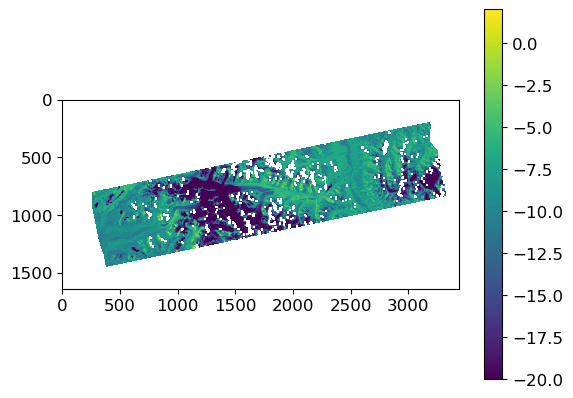

In [11]:
#example of opening a single image
singleimage = gdal.Open(str(meta['imgfile'][15])).ReadAsArray()

plt.figure()
plt.imshow(dB(singleimage),vmin=-20,vmax=2)
plt.colorbar()

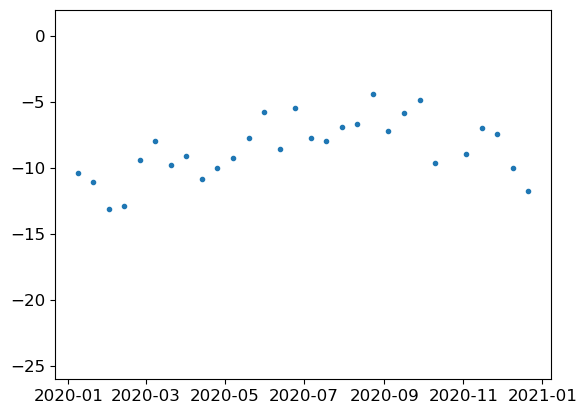

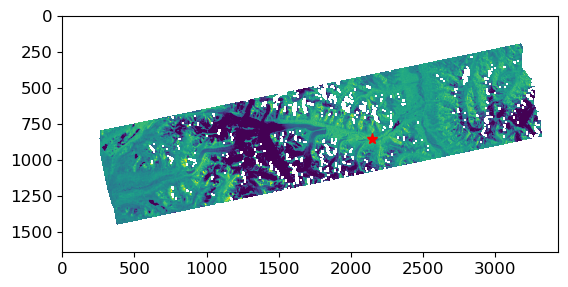

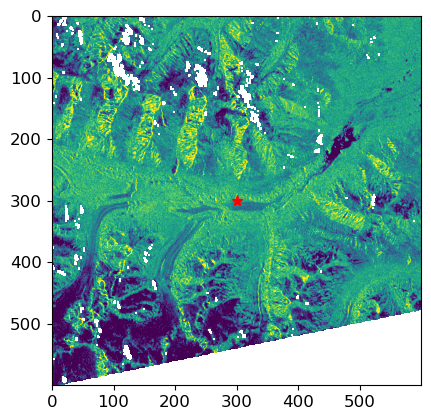

In [153]:
#example of creating a time series of one point

ipt,jpt = 1200,500 #in front of south side
ipt,jpt = 825,1950 #Further down Black Rapids Glacier
ipt,jpt = 800,1400 #part way up Black Rapids Glacier

# ipt,jpt = 850,2150

ptvec = []
for i in range(len(meta)):
    
    cmap = gdal.Open(str(meta['imgfile'][i])).ReadAsArray()
    ptvec.append(dB(cmap[ipt,jpt]))
    

#plot point
plt.figure()
plt.plot(np.array(meta['imgdate']),ptvec,'.')
plt.ylim([-26,2])

#plot where the point is on a map
singleimage = gdal.Open(str(meta['imgfile'][15])).ReadAsArray()
plt.figure()
plt.imshow(dB(singleimage),vmin=-20,vmax=2)
plt.plot(jpt,ipt,'*',color='red',markersize=8)

#plot region in higher resolution
hw = 300 #half window
plt.figure()
plt.imshow(dB(singleimage)[ipt-hw:ipt+hw,jpt-hw:jpt+hw],vmin=-20,vmax=2)
plt.plot(hw,hw,'*',color='red',markersize=8)
# plt.plot(jpt,ipt,'*',color='red',markersize=8)

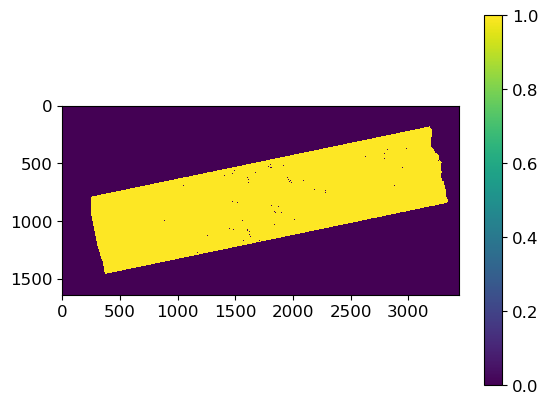

In [50]:
#Load in the mask file

#Class 0: Valid sample not affected by layover or shadow
#- Class 1: Valid sample affected by shadow
#- Class 2 - Valid sample affected by layover
#- Class 3: Valid sample affected by layover and shadow
#- Class 255: Invalid sample (fill value)

for i in data_dir.glob('*_mask.tif'):
    maskfile = i
    break

# print(maskfile)

mask = gdal.Open(str(maskfile)).ReadAsArray()
mask = mask<=3

# print(np.unique(mask))
plt.figure()
plt.imshow(mask,interpolation='nearest')
plt.colorbar()

## 9. Identify the onset of snow melt

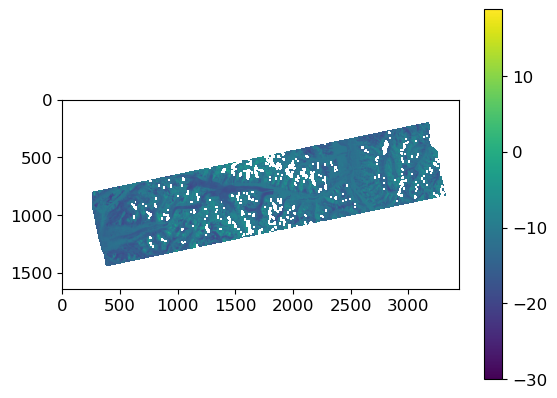

In [156]:
#Identify melt threshold using winter mean backscatter

meltthreshold = -3 #dB melt

imgshape = np.shape(mask)
stacklen = len(stackmeta)


meltth = np.zeros(imgshape)
meltth[~mask]=np.nan

winterstart = datetime(year,1,1)
winterend = datetime(year,4,1)

wintermeta = stackmeta.loc[(stackmeta['imgdate']>=winterstart)&(stackmeta['imgdate']<winterend)]
winterimgs = np.array(wintermeta['imgfile'])
winterlen = len(wintermeta)
# print(winterlen)

#now create the map 
for i,file in enumerate(winterimgs):
    # print(file)
    img = gdal.Open(str(file)).ReadAsArray()
    img = dB(img)
    meltth[mask] += img[mask]
meltth = 1/winterlen * meltth
meltth = meltth + meltthreshold

# print(img)
plt.figure()
plt.imshow(meltth)
plt.colorbar()

Text(0.5, 1.0, '2020-11-03 03:20:19')

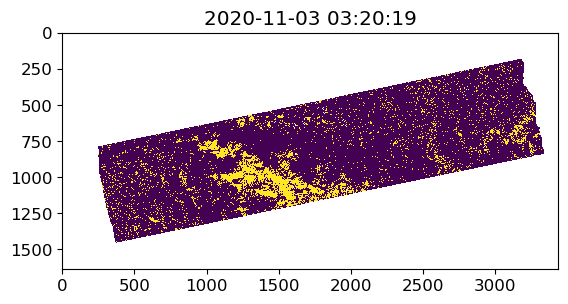

In [109]:
#Plot melt in a single image
imgind = 24

singleimage = gdal.Open(str(stackmeta['imgfile'][imgind])).ReadAsArray()
singleimage = dB(singleimage)
meltmap = np.ma.masked_array(singleimage<meltth,mask=~mask)
# meltmap[~mask]=np.nan

plt.figure()
plt.imshow(meltmap,interpolation='nearest')
plt.title(str(stackmeta['imgdate'].iloc[imgind]))

To track melt onset, we will identify the first image in which there is melt.

The true onset of melt is somewhere between the last image of no melt, and the first image of melt (assumed here to have a uniform distribution, so the expected value is half way between those measurements).

Actually before the seminar I might simplify this, and just make it show the first day of year with an image of melt as the above point is probably getting too much into the weeds.

In [147]:
#Map the date of melt onset
meltonsetmap = np.zeros(imgshape)

#create a vector with the 
doyvec = stackmeta['imgddoy'][:]
doyvec = np.array(doyvec)
doymid = (doyvec[1:]+doyvec[:-1])*0.5
doymid = np.concatenate(([0],doydiff))

#iterate through all image
for i in range(stacklen):
    cimg = gdal.Open(str(stackmeta['imgfile'].iloc[i])).ReadAsArray()
    cmelt = dB(cimg) <= meltth
    updatemask = (cmelt==True) & (meltonsetmap==0)
    meltonsetmap[updatemask] = doymid[i]

meltonsetmap[~mask]=np.nan

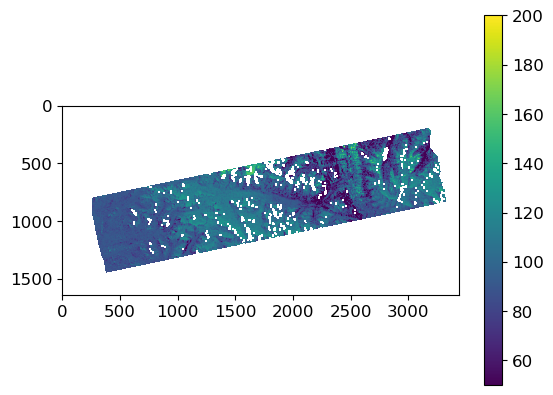

In [157]:
#Plot the onset date of melt
plt.figure()
plt.imshow(meltonsetmap,vmin=50,vmax=200)
plt.colorbar()